In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.datasets import load_digits
digits  = load_digits()
digits.images.shape

(1797, 8, 8)

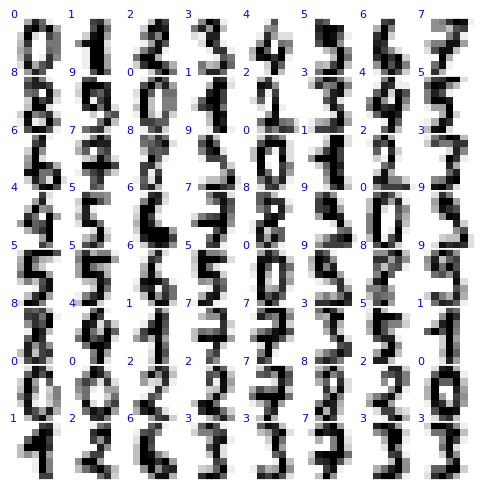

In [4]:
fig,ax = plt.subplots(8,8, figsize=(6,6),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0, wspace=0))
for i,axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.text(0,1, str(digits.target[i]), fontsize=8,
           color='blue', transform=axi.transAxes)

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = \
  train_test_split(digits.data, digits.target, train_size=0.6, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestClassifier
forestC = RandomForestClassifier(n_estimators=1000, random_state=0)
forestC.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [7]:
ypred = forestC.predict(Xtest)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred,
                            target_names=digits.target_names.astype(str)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.97      1.00      0.99        73
           2       1.00      0.97      0.99        71
           3       0.94      0.96      0.95        70
           4       0.98      0.97      0.98        63
           5       0.97      0.97      0.97        89
           6       0.99      0.99      0.99        76
           7       0.94      1.00      0.97        65
           8       0.99      0.94      0.96        78
           9       0.99      0.97      0.98        74

    accuracy                           0.97       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.97      0.97       719



In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9749652294853964

Text(109.44999999999997, 0.5, 'predicted labels')

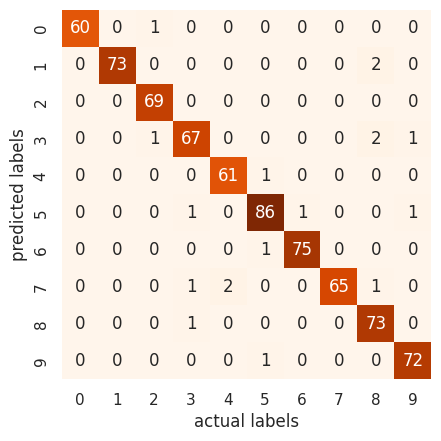

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt='d',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,
            cmap='Oranges')
plt.xlabel('actual labels')
plt.ylabel('predicted labels')

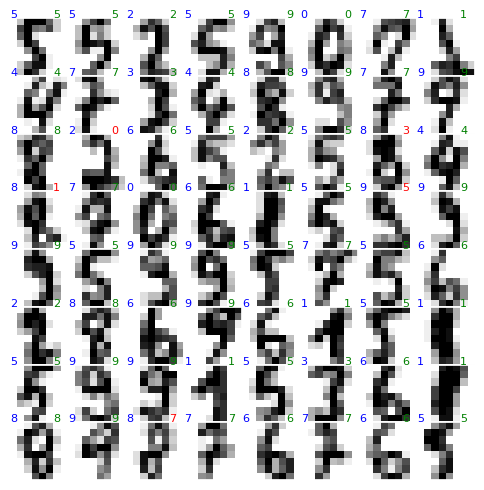

In [11]:
fig,ax  = plt.subplots(8,8, figsize=(6,6),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0, wspace=0))
offset  = 100
for i,axi in enumerate(ax.flat):
  axi.imshow(Xtest[i+offset].reshape(8,8), cmap='binary')
  axi.text(0,1, str(ytest[i+offset]), fontsize=8,
           color='blue', transform=axi.transAxes)
  axi.text(0.75, 1, str(ypred[i+offset]), fontsize=8,
           color='green' if ypred[i+offset]==ytest[i+offset] else 'red',
           transform=axi.transAxes)